## What is Batch Gradient Descent?

Batch Gradient Descent is the most straightforward version of the Gradient Descent algorithm. The key characteristic is that it uses the entire training dataset to compute the gradient of the cost function in a single step. This is in contrast to other variants (like Stochastic or Mini-batch GD) that use only parts of the data at a time.


## The Mathematical Foundation

### 1. The Partial Derivative (The Slope in One Direction)

The core of the algorithm is calculating how to cost function changes with respect to each parameter. This is done using **partial derivatives**.

`∂MSE(θ)/∂θ_j = (2/m) * Σ( (θᵀx⁽ⁱ⁾ - y⁽ⁱ⁾) * x_j⁽ⁱ⁾ )`

**Explanation:**

- `θᵀx⁽ⁱ⁾ - y⁽ⁱ⁾` is the error for the i-th training example (prediction - actual value).
- `x_j⁽ⁱ⁾` is the value of the j-th feature for the i-th training example.
- The sum `Σ` is over all `m` training examples.
- This calculates: "How much does the total error change if I tweak parameter θ_j just a little bit?"

### 2. The Gradient Vector (The Complete Directional Guide)

Instead of computing each partial derivative separately, we can compute them all at once using linear algebra.

`∇θMSE(θ) = [ ∂MSE(θ)/∂θ₀, ∂MSE(θ)/∂θ₁, ..., ∂MSE(θ)/∂θ_n ] = (2/m) * Xᵀ(Xθ - y)`

**Explanation:**

- `X` is the design matrix (with the added column of 1s for the bias term).
- `Xθ - y` is a vector containing the errors for all training examples.
- `Xᵀ(Xθ - y)` efficiently computes the sum of (error \* feature) for all features across all examples.
- The result is a vector where each element is the partial derivative with respect to one parameter.

### 3. The Parameter Update Rule (Taking the Step)

`θ_next = θ_current - η * ∇θMSE(θ)`

**Explanation:**

- `η` (eta) is the learning rate - it controls the size of the step we take.
- We move in the opposite direction of the gradient (- sign) because the gradient points uphill, and we want to go downhill to minimize the cost.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term column
X_b = np.c_[np.ones((100, 1)), X]

In [3]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [4]:
theta

array([[4.21509616],
       [2.77011339]])

In [ ]:
# make predictions
X_new = np.array([[0], [2]])  # create new instances to predict: x=0 and x=2
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0=1: becomes [[1, 0], [1, 2]]

X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [6]:
theta_path_bgd = []


def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

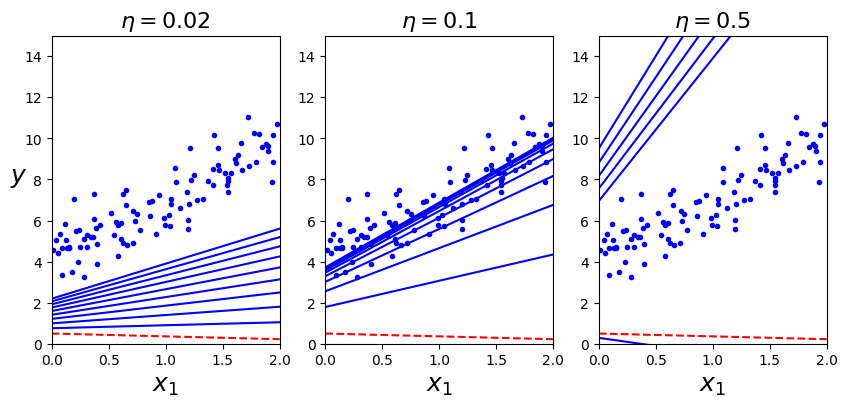

In [7]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)

plt.show()

On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.